# How well the model works?

After training a supervised machine learning model such as a classifier, we want to know how well it works. Normally, we will use a small piece of the data called the test set, which is used as data that the model has never seen before. When we test our model, we feed it the data - and compare the predicitons with the ground truth, measuring the number of true positives, true negatives, false positives and false negatives. **These can subsequently be visualized in a visually appealing confusion matrix**.

Let's see how to create confusion matrix.


# Confusion Matrix

> The confusion matrix answers the question "For my true labels/ground truth, how well does the model predict?"

Training the machine learning model involves its evaluation. In many cases, we have set apart **a test set** for this. The test set is a dataset that the trained model has never seen before. Using it allows you to test whether the model has overfit, or adapted to the training data too well, or whether it still generalizes to new data.

**This allows you to ensure that our model does not perform very poorly on new data while it still performs really good on the training set.**

Evaluation with a test set often happens by feeding all the samples to the model, generating a prediction. Subsequently, the predictions are compared with the **ground truth** - or the true targets corresponding to the test set.

These can subsequently be used for computing various metrics.


# What is blobs?

Those blobs are centered around some point and are the samples are scattered around this point based on some standard deviation.

In [1]:
# !pip install -q -U category-encoders
# !pip install -q -U scikit-learn

In [2]:
import sklearn

print(sklearn.__version__)

1.2.2


In [3]:
# the `make_blobs` function from scikit-learn allows us to generate `blob` or clusters, of samples.
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np

# Congiguration options

# Configuring a fixed seed ensures that every time you run the script, the random number generator initializes in the same way.
blobs_random_seed=42

centers=[(0,0), (5,5), (0,5), (2,3)] # This is a two-dimensional space of out blobs of data

# Cluster standard deviation: the standard deviation with which a sample is drawn from the sampling distribution used by the random point generator
cluster_std=1.3 

# how much data is split off for testing purposes
frac_test_split=0.33

# we have 4 blobs of data
num_features_for_samples=4

# 5000 samples
num_samples_total=5000


inputs, targets=make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std
)

X_train, X_test, y_train, y_test=train_test_split(
    inputs,
    targets,
    test_size=frac_test_split,
    random_state=blobs_random_seed
)

np.savez('example_data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Save the data

We save these data to file. So we do not need to re-create these data again.

In [4]:
data = np.load('/kaggle/working/example_data.npz', allow_pickle=True)
print(data.files)

['X_train', 'X_test', 'y_train', 'y_test']


In [5]:
X_train = data['X_train']
X_test  = data['X_test']
y_train = data['y_train']
y_test  = data['y_test']

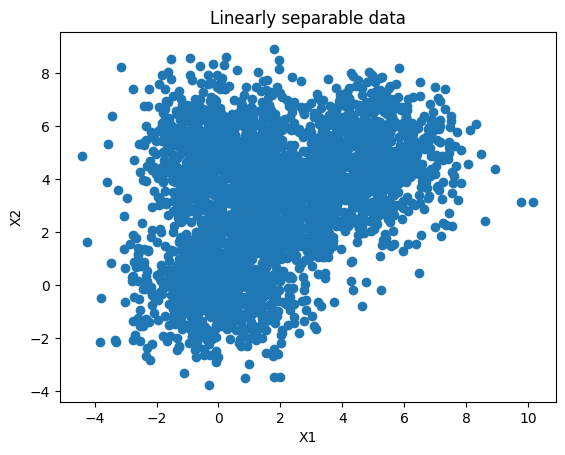

In [6]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

The number of features are two of our data, which means it is two dimensional. For example, in train dataset we has 3350 samples and each sample has 2 dimensions(which means each sample has 2 features).

In [7]:
X_train.shape

(3350, 2)

# Deep learning model VS Traditional machine techniques

Neural network with their relativelt large amount of trainable parameters would likely start overfitting relatively quickly, so they wouldn't be the perferred choice. So, here we use SVM(Support Vector Machine) to construct a decision boundary between separable blobs of data.

# Construct(SVM

We initialize the SVM classifier with a linear kernal.

In [8]:
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

clf=svm.SVC(kernel='linear')
clf

SVC(kernel='linear')

# Training

In [9]:
clf=clf.fit(X_train, y_train)

# Evaluation

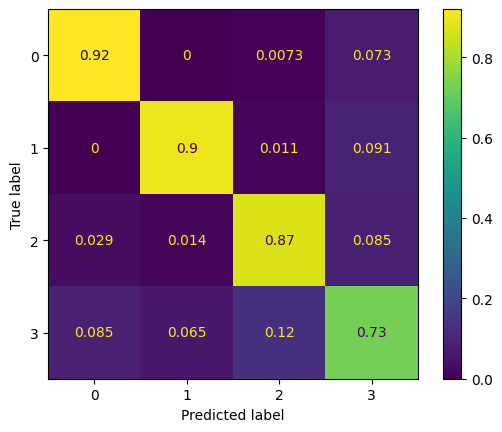

In [10]:
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize='true')
# disp.plot()
plt.show()

## Normalized Confusion Matrix

> Nomalization, converting back the data into the [0,1] format

It is **a normalized confusion matrix**. Its axes describe two meastures:



* The true labels, which are the ground truth represented by our test set.
* The predicted labels, which are the predicitons generated by the machine learning model for the features corresponding to the true labels.


It allows you to easily evaluate how well your model performs. For example, in the model above, for all true lables 1 the repdicted label is 90% 1. This means that all samples from class 1 were classified almost correctly. For the class 2, the performance is a little worse, some samples were predicted as being part of classes 0,1 and 3.

# Mlxtend on decision boundary

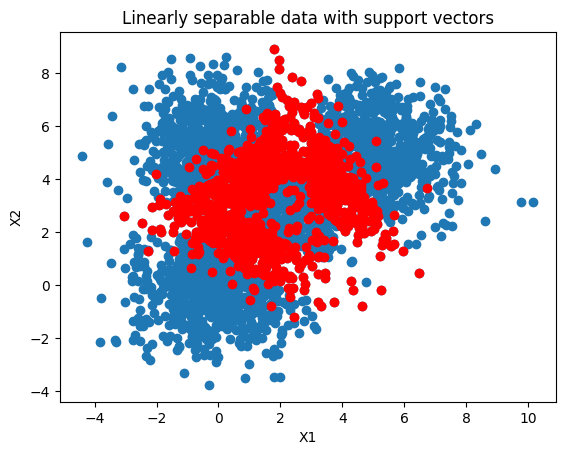

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


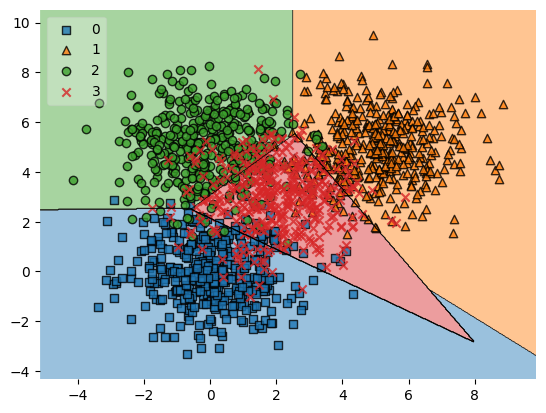

In [11]:
# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.show()

# Acknowledgment
* https://blog.gopenai.com/create-a-confusion-matrix-with-scikit-learn-f72cb063037c